<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab 8: *Unsupervised Learning (Clustering)***

### **Tenggat Waktu: 19 Mei 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab8_1234567890_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 19 Mei 2024, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya,  dari kelas  dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   ()


## Import Library

In [ ]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

## Intro to Clustering
Clustering merupakan bagian dari unsupervised learning. Proses yang dilakukan adalah mengelompokkan data points ke dalam beberapa grup/klaster. Harapannya adalah objek pada klaster yang sama akan memiliki similarity yang tinggi. Sebaliknya, objek yang berada di klaster berbeda akan memiliki similarity yang rendah. Berbeda dengan supervised learning yang datanya sudah memiliki label yang bersesuaian, algoritma clustering tidak secara eksplisit menjelaskan makna tiap klaster. Oleh karena itu, tiap-tiap klaster tersebut perlu diinterpretasikan sendiri.

Algoritma clustering yang akan digunakan untuk lab ini adalah **K-Means** dan **Hierarchical** atau Agglomerative clustering. Berikut adalah penjelasan singkat mengenai keduanya:
1) **K-Means** membagi data menjadi K kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.
2) **Hierarchical Clustering** membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai dendrogram, yang memungkinkan analisis tingkat hierarki.

Mari kita lihat penerapan clustering menggunakan Scikit-Learn.

### K-Means Clustering

**Penjelasan Dataset**

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| marital_status | Status pernikahan |
| income               | Pendapatan tahunan (USD)        |
| num_store_purchases  | Jumlah pembelian melalui toko offline     |
> Dataset merupakan adaptasi dan modifikasi dari https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis dan Lab 9 KASDD Genap 22/23

In [ ]:
# Load dataset
df = pd.read_csv('data_pelanggan_supermarket2.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,income,num_store_purchases,marital_status
0,58138.0,4,Single
1,46344.0,2,Single
2,71613.0,10,Together
3,26646.0,4,Together
4,58293.0,6,Married


In [ ]:
print(f"Ukuran dataset: {df.shape}")

Ukuran dataset: (500, 3)


In [ ]:
# Melihat informasi dasar dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               500 non-null    float64
 1   num_store_purchases  500 non-null    int64  
 2   marital_status       500 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
# Melihat deskripsi statistik dasar dari kolom
df.describe()

,income,num_store_purchases
count,500.000000,500.000000
mean,51387.664000,5.800000
std,21245.949246,3.306034
min,2447.000000,0.000000
25%,34284.000000,3.000000
50%,50898.000000,5.000000
75%,67320.000000,8.000000
max,157243.000000,13.000000


Pada tahap ini, kita bisa melakukan imputasi data yang kosong, menghilangkan duplikat, dan menghapus outlier. Namun, hal ini tidak perlu kita lakukan pada dataset ini karena dataset tersebut sudah bersih.

Hal yang perlu dilakukan selanjutnya adalah melakukan standarisasi dan encoding kolom kategorikal.

In [ ]:
# Melakukan Standarisasi
from sklearn.preprocessing import StandardScaler

numerical_attributes = ['income', 'num_store_purchases']

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_attributes]), columns=numerical_attributes)
df_std['marital_status'] = df['marital_status']  # Membiarkan dulu atribut kategorikal
df_std.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,Single
1,-0.237632,-1.150565,Single
2,0.952915,1.271677,Together
3,-1.165702,-0.545004,Together
4,0.325344,0.060556,Married


In [ ]:
# Melakukan Encoding
print(f"Jumlah label unik dari marital status: {df['marital_status'].nunique()}")
print(f"{df['marital_status'].unique()}\n")

Jumlah label unik dari marital status: 6
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']



In [ ]:
from category_encoders import OrdinalEncoder

marital_map =[{'col': 'marital_status',
             'mapping':{'Single': 1,
                        'Alone': 1,
                        'Together': 2,
                        'Married': 3,
                        'Divorced': 4,
                        'Widow': 5,}
            }]

enc2 = OrdinalEncoder(mapping=marital_map)
df_enc = enc2.fit_transform(df_std)

df_enc.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,1
1,-0.237632,-1.150565,1
2,0.952915,1.271677,2
3,-1.165702,-0.545004,2
4,0.325344,0.060556,3


**Persiapan Clustering**<br>
Selanjutnya, kita harus menentukan nilai K sebagai input dari algoritma K-means. **Silhouette Coefficient** merupakan salah satu metrik umum untuk mengevaluasi data yang tidak memiliki *true cluster*. Silhouette Coefficient menghitung rata-rata jarak intra-cluster dan minimum rata-rata jarak inter-cluster.


In [ ]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(df_enc)
    silhouette_avg = silhouette_score(df_enc, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.38807169772444033
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3728268092814725
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.3666925447292704
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.3615470682224549


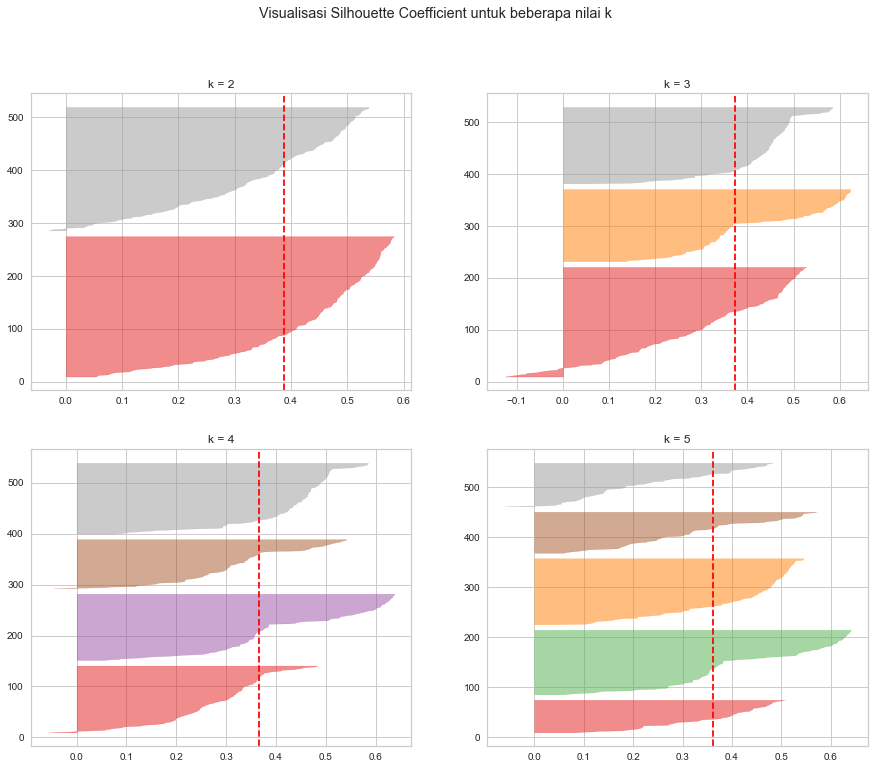

In [ ]:
# Memvisualisasikan silhouette

fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_enc)

**Metrik Pendukung**
Metrik lain yang juga menjadi acuan untuk menentukan jumlah klaster adalah **Elbow Method**. Cara kerjanya adalah menampilkan plot inersia di berbagai nilai k yang menunjukkan seberapa baik klaster yang dihasilkan terhadap datanya. Pada nilai k yang tepat, akan muncul suatu "inflection point" di mana terjadi perubahan drastis pada gradien kurva.

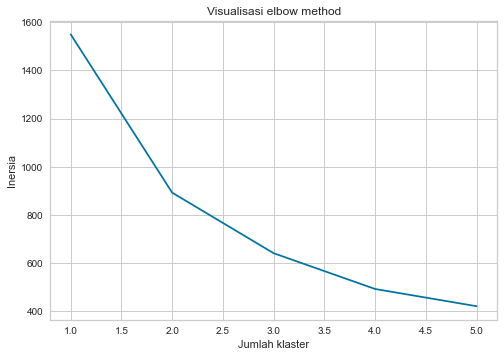

In [ ]:
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_enc)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

Berdasarkan hasil metrik Silhouette Coeff. dan Elbow Method, data ini tidak menghasilkan klaster yang baik. Nilai $s(C)$ untuk `k = 2`, `k = 3`, `k = 4`, dan `k = 5` tidak jauh berbeda. Hal ini juga dibuktikan dari plot Elbow Method di atas: tidak ada inflection point yang perubahan gradiennya cukup drastis. Nilai K yang dipilih adalah `k = 2` karena nilai $s(C)$ untuk `k = 2` merupakan yang paling tinggi. Selain itu, perubahan gradien inersia di sebelah kiri `k = 2` paling drastis di antara keempat kandidat klaster

**Train Model**<br>
Latih model KMeans dengan memilih parameter cluster berdasarkan nilai k yang dipilih.

In [ ]:
# Latih model sesuai jumlah klaster optimal
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(df_enc)

In [ ]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_enc.copy())
df_with_clusters['cluster'] = assignment
df_with_clusters.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,1
1,-0.237632,-1.150565,1,1
2,0.952915,1.271677,2,0
3,-1.165702,-0.545004,2,1
4,0.325344,0.060556,3,0


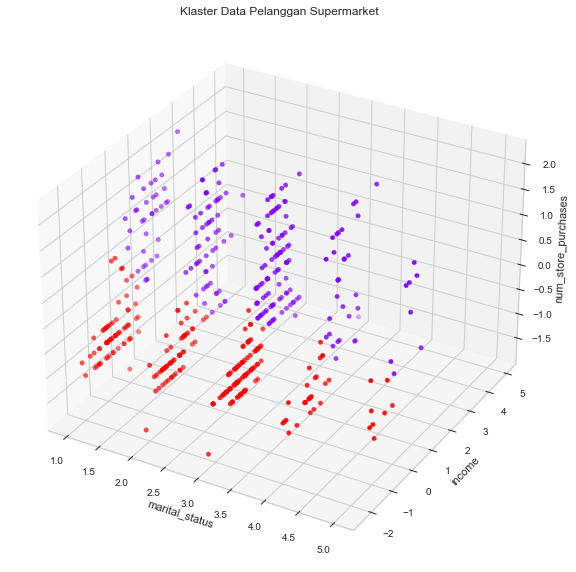

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['marital_status']
y = df_with_clusters['income']
z = df_with_clusters['num_store_purchases']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

> **Contoh interpretasi hasil**: Pada tiap kelas `marital_status` terdapat kedua jenis cluster, sehingga kelas `marital_status` tidak menentukan clustering secara signifikan. Di sisi lain, pola yang terlihat adalah cluster ungu selalu berada di kiri cluster merah. Ini menandakan bahwa atribut `income` merupakan pemisah utama. Cluster merah juga memiliki `num_store_purchases` yang lebih merata dibandingkan cluster ungu yang kebanyakan di bawah.

### Hierarchical (Agglomerative) Clustering
Berbeda dengan KMeans yang menentukan jumlah klaster kemudian mengevaluasinya, Agglomerative clustering mencari garis vertikal terpanjang yang menunjukkan pemisahan yang baik antara klaster yang terbentuk. Sebelum mengembangkan model untuk memprediksi klaster dari data, langkah pertama adalah menentukan jumlah klaster optimal berdasarkan visualisasi dendrogram.

Kita akan menggunakan dataset yang sama (`df_enc`) untuk pembuatan clustering hierarchical ini.

In [ ]:
# Membuat model sementara untuk divisualisasikan
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = agglomerative.fit(df_enc)

# Menampilkan label klaster tiap data points
cluster_assignment.labels_

array([307, 438, 499, 260, 342, 429, 367, 305, 497, 323, 310, 496, 357,
       421, 387, 295, 341, 493, 253, 451, 414, 495, 287, 435, 447, 266,
       368, 315, 280, 345, 351, 490, 316, 352, 296, 330, 376, 303, 349,
       445, 489, 401, 482, 249, 453, 491, 247, 263, 284, 293, 275, 257,
       297, 407, 424, 391, 397, 392, 462, 309, 255, 432, 365, 369, 317,
       418, 325, 413, 420, 422, 354, 416, 439, 476, 463, 264, 277, 466,
       443, 360, 436, 372, 474, 340, 302, 460, 409, 477, 398, 427, 198,
       175, 483, 390, 444, 492, 379, 262, 488, 380, 370, 389, 294, 465,
       415, 374, 411, 343, 478, 346, 431, 333, 417, 259, 450, 271, 308,
       258, 327, 467, 366, 322, 378, 400, 291, 388, 232, 468, 487, 375,
       383, 425, 441, 254, 464, 210, 326, 452, 217, 381, 384, 486, 243,
       162, 412, 290, 471, 475, 498, 406, 300, 473, 328, 157, 481, 449,
       371, 324, 225, 289, 184, 386, 183, 244, 448, 428, 359, 278, 399,
       306, 182, 238, 131, 298, 461, 208, 265, 240, 470, 394, 18

In [ ]:
# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

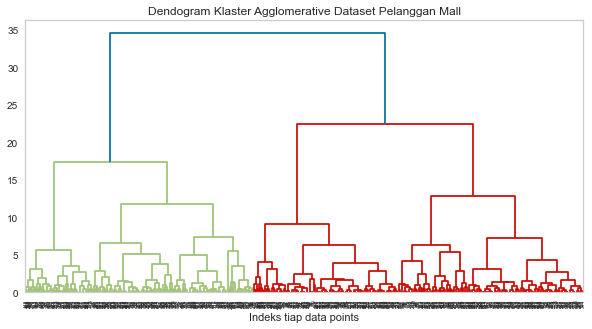

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.show()

Secara rule-of-thumb, garis biru merupakan jumlah k yang optimal. Namun, berdasarkan dendogram yang dibentuk, data ini tidak menghasilkan klaster yang baik: panjang garis biru dan merah sebenarnya tidak jauh berbeda. Idealnya, garis biru akan jauh lebih panjang daripada garis-garis lainnya dan kita akan lebih mudah membuat batas threshold seperti di bawah ini.

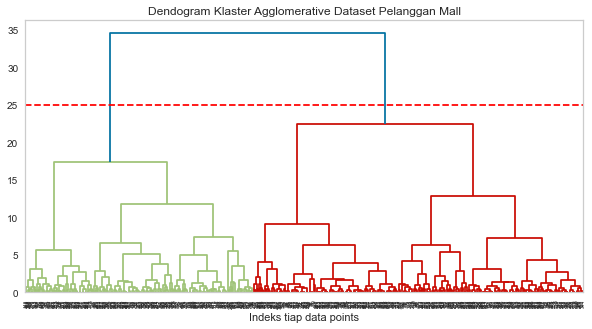

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.axhline(y = 25, color = 'red', linestyle = 'dashed')
plt.show()

Selanjutnya, kita bisa membuat model Agglomerative Clustering dengan nilai k yang didapatkan sebelumnya. Setelah itu, visualisasikan hasil modelnya.

In [ ]:
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=2)
cluster_assignment2 = agglomerative.fit_predict(df_enc)

In [ ]:
# Append hasil clustering ke dataframe
df_with_clusters_agg = pd.DataFrame(df_enc.copy())
df_with_clusters_agg['cluster'] = cluster_assignment2
df_with_clusters_agg.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,0
1,-0.237632,-1.150565,1,0
2,0.952915,1.271677,2,1
3,-1.165702,-0.545004,2,0
4,0.325344,0.060556,3,1


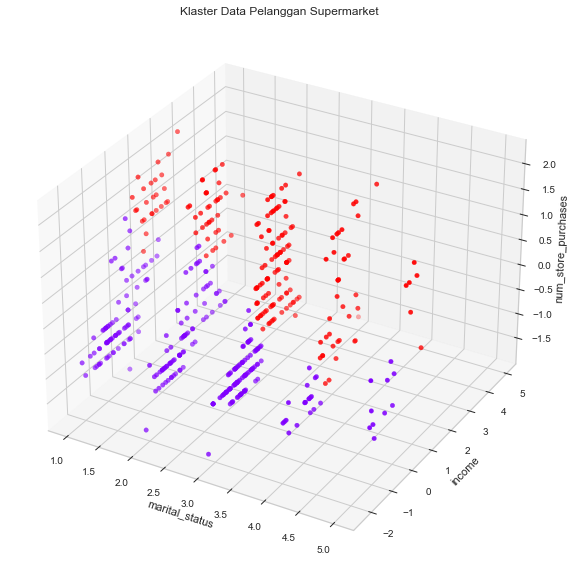

In [ ]:
# Melakukan visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['marital_status']
y = df_with_clusters_agg['income']
z = df_with_clusters_agg['num_store_purchases']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

## Latihan Clustering
### Deskripsi Dataset

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| CUST_ID                    | ID pelanggan (Kategorikal)                 |
| BALANCE              | Saldo rekening pelanggan                |
| BALANCE_FREQUENCY  | Seberapa sering saldonya ter-update (1 = sering, 0 tidak) |
| PURCHASES                | Jumlah total pembelian        |
| ONEOFF_PURCHASES                | Jumlah pembelian maksimum        |
| INSTALLMENTS_PURCHASES                | Jumlah pembelian untuk kredit       |
| CASH_ADVANCE   | Uang tunai yang diberikan oleh pengguna        |
| PURCHASES_FREQUENCY  | Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)   |
| ONEOFFPURCHASESFREQUENCY  | Seberapa sering Pembelian dilakukan dalam satu kali transaksi (1 = sering dibeli, 0 = jarang dibeli)   |
| PURCHASESINSTALLMENTSFREQUENCY   | Seberapa sering pembelian dalam angsuran dilakukan (1 = sering dilakukan, 0 = jarang dilakukan) |
| CASHADVANCEFREQUENCY   | Seberapa sering uang tunai di muka dibayar   |
| CASHADVANCETRX   | Jumlah Transaksi yang dilakukan dengan CASH_ADVANCE   |
| PURCHASES_TRX     | Jumlah transaksi pembelian yang dilakukan              |
| CREDIT_LIMIT     | Batas Kartu Kredit untuk pengguna              |
| PAYMENTS   | Jumlah Pembayaran yang dilakukan oleh pengguna    |
| MINIMUM_PAYMENTS   | Jumlah pembayaran minimum yang dilakukan oleh pengguna  |
| PRCFULLPAYMENT   | Persentase pembayaran penuh yang dibayarkan oleh pengguna   |
| TENURE   | Masa pelayanan kartu kredit bagi pengguna |
> Data diambil dari [https://www.kaggle.com/datasets/arjunbhasin2013/ccdata](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [ ]:
# load dataset

In [ ]:
# melihat informasi dasar dataset

In [ ]:
# melihat deskripsi statistik dataset

### Soal 1: Preprocess Dataset

a) Pada tahap preprocessing dataset, persiapan yang dilakukan setidaknya perlu melakukan hal berikut:
- Mengecek dan menangani *missing values* dan data duplikat
- Menangani *outlier*
- Melakukan standarisasi
- Melakukan encoding pada atribut kategorikal

b) Jelaskan metode standarisasi yang dipilih beserta alasan (dan referensinya jika ada)

In [ ]:
# handle missing values and duplicate

In [ ]:
# handle outlier

In [ ]:
# standarisasi

In [ ]:
# encoding

> Tuliskan alasan pemilihan standarisasi ...

### Soal 2: K-Means Clustering

a) Buatlah dataset baru yang hanya memiliki fitur (kolom) pilihan. Pilih setidaknya 3 fitur, mencakup fitur numerik dan kategorikal, dan jelaskan alasan pemilihan fitur tersebut. Dataset ini akan digunakan untuk melakukan clustering

In [ ]:
# membuat dataset baru

b) Hitung dan visualisasikan nilai Silhouette Coefficient untuk dataset sebelumnya. Berikan interpretasi hasilnya

In [ ]:
# visualisasi silhouette coefficient

> Tuliskan interpretasi hasil...

c) Tampilkan visualisasi elbow method dengan suatu rentang nilai k (bisa berbeda) dan jelaskan perbandingannya dengan nilai Silhouette Coefficient yang didapatkan sebelumnya. Setelah itu, **pilih nilai k yang optimal** berdasarkan keduanya.

In [ ]:
# elbow method

> Tuliskan interpretasi...

d) Latih model KMeans dengan **nilai k yang sudah ditentukan** sebelumnya. Visualisasikan hasil clustering dan berikan interpretasi hasilnya.

In [ ]:
# latih

In [ ]:
# visualisasi

> Tuliskan interpretasi ...

### Soal 3: Hierarchical Clustering

a) Latih model Agglomerative clustering sementara tanpa menspesifikasikan jumlah cluster

In [ ]:
# agglomerative clustering

b) Tampilkan dendogram dan berikan interpretasinya. Selanjutnya, tentukan jumlah klaster (nilai k) yang optimal

In [ ]:
# dendogram

> Tuliskan interpretasi hasil...

c) Latih model agglomerative clustering dengan nilai k yang sudah ditentukan sebelumnya. Visualisasikan hasil clustering dan bandingkan hasilnya dengan hasil clustering KMeans.

In [ ]:
# latih

In [ ]:
# visualisasi

> Tuliskan interpretasi hasil...

### Soal 4: Latihan Teoretis
a) Jelaskan 2 metrik evaluasi yang digunakan dalam lab ini!
   > tuliskan jawaban ...

b) Jelaskan cara menghitung intra-cluster similarity dan inter-cluster dissimilarity!
   > tuliskan jawaban ...

c) K-Means adalah algoritma yang bekerja baik untuk data globular, tetapi tidak untuk data yang memiliki klaster sembarang. Apa yang akan terjadi apabila K-Means dipakai untuk kasus tersebut?
   > tuliskan jawaban ...

d) Jika kita menjalankan `sklearn.cluster.KMeans` berulang kali, apakah akan selalu didapatkan hasil yang sama?
   > tuliskan jawaban ...